### Imports

In [3]:
from CSIKit.filters.passband import lowpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel

from CSIKit.reader import get_reader
from CSIKit.tools.batch_graph import *
from CSIKit.tools.convert_csv import *
from CSIKit.util import csitools

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pywt
import pywt.data

### Converting to csv functions

In [7]:
def convert_pcap_to_csv(directory, inp, out):
    infile = "csi_tests/" + directory + "/pcap/" + inp
    outfile = "csi_tests/" + directory + "/csv/" + out
    generate_csv(infile, outfile, "amplitude")
def convert_pcap_to_csv1(inp):
    infile = "csi_data_pcap/" + inp
    inp = inp.replace("pcap","csv")
    outfile = "csi_data_csv/" + inp
    generate_csv(infile, outfile, "amplitude")

In [5]:
#for i in listdir("csi_data_pcap/"):
#    convert_pcap_to_csv1(i)

### One heatmap plot function

In [8]:
def plot1(inp):
    data = inp
    my_reader = get_reader(data)
    csi_data = my_reader.read_file(data, scaled=True)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")

    bg = BatchGraph(data)
    bg.heatmap()

### File lists

In [11]:
onlyfiles_pcap = ["csi_data_pcap/" + f for f in listdir('csi_data_pcap')
 if isfile(join('csi_data_pcap', f))]
onlyfiles_csv = ["csi_data_csv/" + f for f in listdir('csi_data_csv')
 if isfile(join('csi_data_csv', f))]
onlyfiles_csv_names_only = [f for f in listdir('csi_data_csv')
 if isfile(join('csi_data_csv', f))]

### List of csv file dataframes, cleared of -inf and NaNs

In [8]:
csv_dataframe_list = []
l = {x for x in range(257)} 

for filename in onlyfiles_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = np.arange(0,len(df.columns))
    df = df.replace(-np.inf, np.nan)
    df = df.replace(np.inf, np.nan)
    df = df.replace(np.nan, df.mean().mean())
    csv_dataframe_list.append(df)
#csv_dataframe_list[4]

### Plot all heatmaps

In [28]:
def plot_many():
    for i in onlyfiles_pcap:
        plot1(i)
#plot_many()

### All csv's in one dataframe

In [29]:
df = pd.concat(map(pd.read_csv, onlyfiles_csv))
df

,Sub 0 RXTX 0/0,Sub 1 RXTX 0/0,Sub 2 RXTX 0/0,Sub 3 RXTX 0/0,Sub 4 RXTX 0/0,Sub 5 RXTX 0/0,Sub 6 RXTX 0/0,Sub 7 RXTX 0/0,Sub 8 RXTX 0/0,Sub 9 RXTX 0/0,...,Sub 246 RXTX 0/0,Sub 247 RXTX 0/0,Sub 248 RXTX 0/0,Sub 249 RXTX 0/0,Sub 250 RXTX 0/0,Sub 251 RXTX 0/0,Sub 252 RXTX 0/0,Sub 253 RXTX 0/0,Sub 254 RXTX 0/0,Sub 255 RXTX 0/0
0,14.623980,40.901875,19.294189,16.532125,10.000000,20.253059,9.030900,19.542425,0.000000,13.979400,...,15.563025,20.644580,12.304489,18.633229,14.623980,22.504200,6.989700,21.613680,16.989700,15.314789
1,20.253059,40.901875,14.149733,12.041200,19.493900,15.314789,50.453425,53.281451,55.744873,57.162989,...,47.208619,51.980464,54.808991,56.584893,57.763852,21.958997,15.682017,16.127839,19.030900,16.989700
2,19.030900,40.901875,16.532125,16.532125,13.979400,14.623980,17.853298,12.041200,13.979400,18.129134,...,15.682017,17.634280,12.304489,18.129134,11.139434,20.253059,17.160033,12.304489,11.139434,6.989700
3,17.634280,40.901875,6.020600,20.681859,18.573325,13.010300,51.124609,53.776213,55.720813,57.285486,...,46.231666,51.087882,54.552774,56.628758,57.865953,17.160033,0.000000,19.493900,14.623980,17.634280
4,19.294189,40.901875,6.989700,14.623980,16.020600,15.682017,6.020600,12.304489,14.623980,6.020600,...,9.030900,15.314789,18.692317,18.129134,16.020600,20.043214,12.304489,18.573325,19.294189,16.989700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,17.634280,18.129134,6.989700,15.051500,16.989700,17.160033,49.189525,52.882336,54.536394,56.703665,...,47.301522,51.409478,54.422367,56.583940,57.672331,19.493900,16.020600,9.030900,12.552725,17.242759
338,16.989700,18.129134,6.989700,6.020600,13.010300,15.682017,49.291174,52.273956,54.273709,56.519987,...,47.757196,51.577981,54.512490,56.656044,57.696845,18.129134,14.149733,18.573325,20.681859,12.304489
339,13.979400,18.129134,9.030900,16.127839,14.149733,16.901961,49.527440,52.637426,54.928386,56.919881,...,47.993543,51.528782,54.393406,56.065845,57.444886,12.041200,12.552725,13.010300,14.623980,10.000000
340,21.139434,18.129134,6.989700,3.010300,6.989700,14.623980,50.563292,53.550375,55.221063,57.013961,...,47.433216,51.194209,54.029145,56.487151,57.568262,23.820170,12.041200,23.443923,19.542425,18.129134


### Line plot

#### One line plot of frame

<AxesSubplot:>

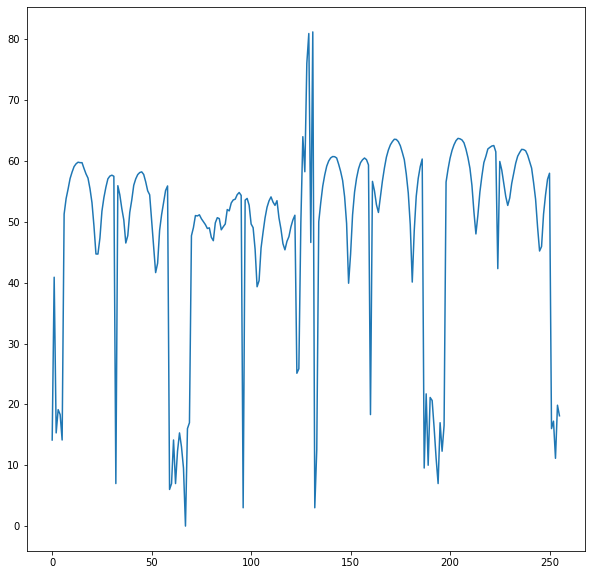

In [31]:
pd.DataFrame(csv_dataframe_list[2].iloc[2]).plot.line(figsize=[10,10], legend=False)

#### Ten line plots of frame

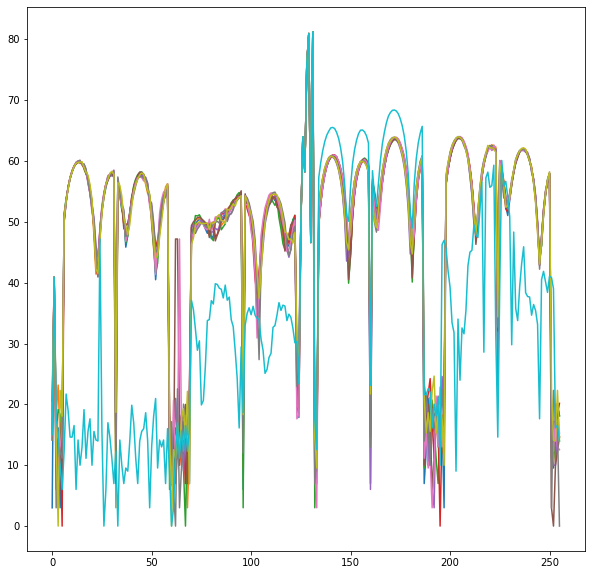

In [32]:
for i in range(10):
    csv_dataframe_list[2].iloc[i].plot.line(figsize=[10,10], legend=False)

### Line plot of subcarrier

<AxesSubplot:>

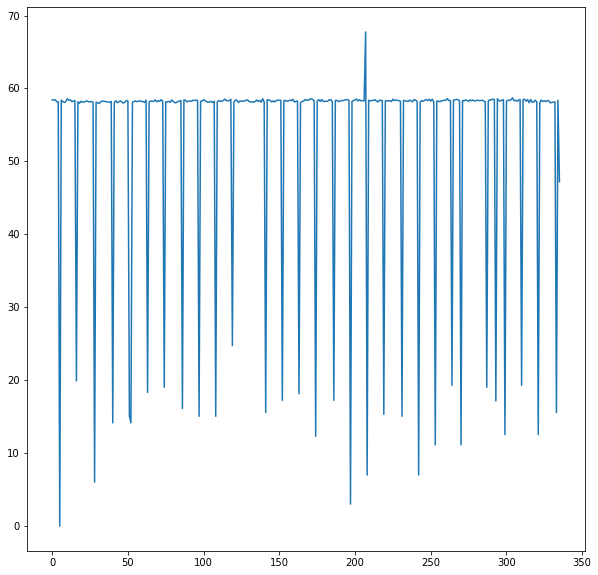

In [33]:
csv_dataframe_list[6][10].plot.line(figsize=[10,10], legend=False)

### Ten line plots of subcarrier

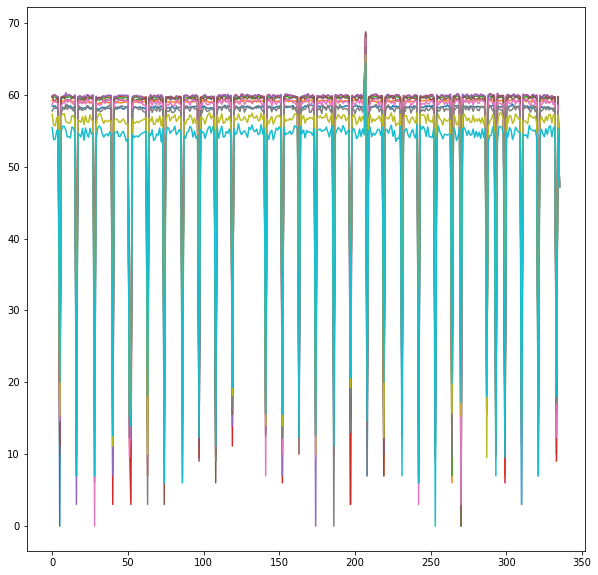

In [37]:
for i in range(10):
    csv_dataframe_list[6][i+10].plot.line(figsize=[10,10], legend=False)

### Correlation

In [29]:
def correlation_all():
    for i in range(len(csv_dataframe_list)):
        sns.heatmap(csv_dataframe_list[i].corr())
        plt.show()
#correlation_all()

### Dataframe of csv_phase

In [84]:
#for i in listdir("csi_tests_pcap/"):
#    convert_pcap_to_csv1(i)

In [83]:
onlyfiles_csv_phase = ["csi_tests_phase/" + f for f in listdir('csi_tests_phase')
 if isfile(join('csi_tests_phase', f))]
lst_phase = []
l = {x for x in range(257)} 
for filename in onlyfiles_csv_phase:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = np.arange(0,len(df.columns))
    lst_phase.append(df)
lst_phase[4]

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.325818,1.429783,2.356194,2.455863,2.498092,-1.373401,-1.185767,-1.220864,-1.230111,-1.266988,...,-3.051672,-3.057016,-3.042471,-2.896614,-2.399025,0.244979,-0.950547,1.325818,-0.197396,-2.922924
1,-0.438337,1.429783,0.262064,0.898487,1.617983,2.327455,3.012485,-2.651335,-2.065569,-1.557356,...,2.777742,-2.893798,-2.391932,-1.976912,-1.709436,-1.881795,-2.272111,-2.172154,-1.840461,-2.070143
2,1.815775,1.429783,-0.269973,0.100839,0.549738,0.999889,1.433527,1.823351,2.166254,2.447444,...,-1.109102,-0.774140,-0.510598,-0.338356,-0.335928,-0.746743,-1.369842,-1.503571,-1.389329,0.708626
3,-0.960070,1.429783,-0.301361,0.096809,0.559048,1.018854,1.439620,1.822354,2.153073,2.420232,...,-1.109028,-0.760821,-0.483617,-0.321160,-0.302113,-0.717012,-1.361865,-1.503835,-1.379800,-2.384758
4,0.244979,1.429783,-1.745469,0.266252,-0.896055,1.849096,1.403921,1.852622,2.307982,2.752008,...,-2.099456,-1.619243,-1.077928,-0.567470,0.555263,0.099669,-0.226799,-0.576375,-0.412410,2.622447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2.058494,1.429783,-1.315614,-0.883394,-0.411961,0.069920,0.516395,0.913170,1.241683,1.493365,...,-2.931619,-2.565749,-2.279561,-2.068913,-2.016656,-2.292204,-2.684247,-2.718739,-2.569532,0.712358
111,1.030377,1.429783,2.677945,0.915101,-1.030377,2.910502,-2.151038,-2.147714,-2.164633,-2.240918,...,1.297935,1.308787,1.293333,1.397374,1.496857,-0.244979,0.767218,-1.284745,-0.785398,1.797595
112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Copying the dataframe, normalization, pca, wavelet

In [15]:
files = ['brushteeth_', 'cook_', 'drink_', 'getintobed_', 'nothing_', 'sitdown_chair_', 'sitdown_sofa_', 'sleeping_', 'standup_chair_', 'standup_sofa_', 'walk_', 'washingdishes_']
test_csv_dataframe_list = []
train_csv_dataframe_list = []
for file in files:
    for i in range(25):
        df = pd.read_csv(fr'csi_data_csv/{file} ({i+1}).csv')
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.replace(np.nan, df.mean().mean(), inplace=True)
        train_csv_dataframe_list.append(df)
        df.to_csv(fr'csi_data_train_csv/{file} ({i+1}).csv', index=False)
    for i in range(25, 30):
        df = pd.read_csv(fr'csi_data_csv/{file} ({i+1}).csv')
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.replace(np.nan, df.mean().mean(), inplace=True)
        test_csv_dataframe_list.append(df)
        df.to_csv(fr'csi_data_test_csv/{file} ({i+1}).csv', index=False) 

In [18]:
train_csv_dataframe_list_scaled = []
scaler = StandardScaler()
for i in train_csv_dataframe_list:
    df_scaled = pd.DataFrame(scaler.fit_transform(i), columns = i.columns)
    train_csv_dataframe_list_scaled.append(df_scaled)
    
train_csv_dataframe_list_scaled[4]

,Sub 0 RXTX 0/0,Sub 1 RXTX 0/0,Sub 2 RXTX 0/0,Sub 3 RXTX 0/0,Sub 4 RXTX 0/0,Sub 5 RXTX 0/0,Sub 6 RXTX 0/0,Sub 7 RXTX 0/0,Sub 8 RXTX 0/0,Sub 9 RXTX 0/0,...,Sub 246 RXTX 0/0,Sub 247 RXTX 0/0,Sub 248 RXTX 0/0,Sub 249 RXTX 0/0,Sub 250 RXTX 0/0,Sub 251 RXTX 0/0,Sub 252 RXTX 0/0,Sub 253 RXTX 0/0,Sub 254 RXTX 0/0,Sub 255 RXTX 0/0
0,1.211756,-1.421085e-14,-0.333685,-0.748004,0.374443,-0.571752,0.284149,0.330731,0.310408,0.310921,...,0.321076,0.267687,0.279077,0.290632,0.288392,-0.073946,1.069940,-1.132009,0.498309,-0.375163
1,0.119826,-1.421085e-14,0.461068,0.232776,0.127240,-0.813306,0.379289,0.341277,0.290855,0.291834,...,0.262342,0.219316,0.261958,0.309467,0.303194,0.185653,-1.161658,0.651775,1.049497,0.470277
2,0.977300,-1.421085e-14,1.242462,0.658222,0.622070,0.166544,0.382197,0.319289,0.315069,0.304758,...,0.174486,0.203068,0.278463,0.309543,0.300074,0.461007,0.037254,-0.484883,-0.394109,0.185097
3,1.342109,-1.421085e-14,0.176550,0.149770,-0.297315,0.243914,0.326569,0.318248,0.306570,0.313170,...,0.237803,0.272180,0.293422,0.310415,0.313443,-0.841981,0.407782,1.390943,0.659315,-0.158329
4,1.342109,-1.421085e-14,0.562544,1.201948,-0.138015,1.472354,0.248604,0.284937,0.310240,0.295383,...,0.467700,0.390341,0.329498,0.300873,0.301160,0.638431,0.696279,-0.800072,0.291376,-0.587228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.466262,-1.421085e-14,0.461068,0.057692,-0.297315,-0.395533,0.249630,0.310162,0.331853,0.322552,...,0.398231,0.364619,0.346669,0.298410,0.316198,-1.713220,0.100690,0.271918,-1.730489,0.628494
330,-0.373432,-1.421085e-14,-1.253347,0.355195,1.018049,0.410619,0.247674,0.272770,0.325994,0.302293,...,0.451967,0.393118,0.367573,0.320099,0.314515,-0.215229,0.696279,0.354026,0.731316,-0.158329
331,-1.076901,-1.421085e-14,0.369166,0.592054,-0.632845,0.338887,0.273508,0.290740,0.333927,0.305366,...,0.359630,0.372131,0.340159,0.306674,0.300395,0.480876,-1.161658,4.923976,1.016532,-0.672389
332,-0.241055,-1.421085e-14,0.292357,-0.936161,-0.792145,0.166544,0.293779,0.306554,0.330593,0.317649,...,0.344464,0.327305,0.326624,0.300953,0.286984,-0.567417,0.866593,-0.310540,0.761832,0.962191


In [19]:
df_train_all = pd.concat(train_csv_dataframe_list_scaled)
df_train_all

,Sub 0 RXTX 0/0,Sub 1 RXTX 0/0,Sub 2 RXTX 0/0,Sub 3 RXTX 0/0,Sub 4 RXTX 0/0,Sub 5 RXTX 0/0,Sub 6 RXTX 0/0,Sub 7 RXTX 0/0,Sub 8 RXTX 0/0,Sub 9 RXTX 0/0,...,Sub 246 RXTX 0/0,Sub 247 RXTX 0/0,Sub 248 RXTX 0/0,Sub 249 RXTX 0/0,Sub 250 RXTX 0/0,Sub 251 RXTX 0/0,Sub 252 RXTX 0/0,Sub 253 RXTX 0/0,Sub 254 RXTX 0/0,Sub 255 RXTX 0/0
0,-0.273741,-7.105427e-15,0.885691,-0.109777,0.750845,-0.887268,0.237856,0.303826,0.328241,0.337434,...,0.439990,0.369826,0.342783,0.303335,0.315024,-0.885585,0.511908,0.377410,0.794572,-0.190664
1,0.975658,-7.105427e-15,0.292936,-1.321834,0.234324,0.597262,0.302293,0.313851,0.335471,0.326547,...,0.372720,0.365751,0.329560,0.318567,0.325866,0.074634,0.844296,-0.276394,0.120128,0.383727
2,0.828016,-7.105427e-15,-1.069072,0.185467,0.750845,0.552255,0.332631,0.325537,0.287891,0.305692,...,0.340741,0.308424,0.319498,0.366770,0.335178,-1.064849,0.564110,0.948396,-0.321515,-0.546864
3,0.212330,-7.105427e-15,-0.266561,-0.879176,1.693137,-1.378448,-3.074421,-2.829133,-3.083651,-3.183905,...,-2.823934,-2.508514,-3.097488,-2.970988,-3.661824,-0.702290,0.142866,0.501087,0.416178,0.739927
4,-1.592344,-7.105427e-15,-1.701263,0.244179,-1.293592,-0.079837,0.359448,0.322722,0.323037,0.311224,...,0.317930,0.329795,0.330134,0.317271,0.306831,1.197125,-1.092856,0.670901,0.762996,1.205222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.748585,3.552714e-15,0.098514,1.140087,1.401455,1.141167,0.354597,0.338360,0.303486,0.330239,...,0.326157,0.344378,0.348431,0.372458,0.363444,-1.518502,-0.751173,-1.542793,-1.014887,-1.258468
349,-0.358490,3.552714e-15,0.409046,-2.330107,0.054037,1.712742,0.189585,0.287471,0.358916,0.374553,...,0.368594,0.374524,0.348202,0.346848,0.363491,-1.518502,0.527153,0.328379,0.174406,-1.083895
350,0.462782,3.552714e-15,-1.025499,0.650508,0.054037,-0.379248,0.263123,0.330104,0.379868,0.368396,...,0.303991,0.350886,0.338652,0.331786,0.337698,-1.172322,-0.444853,-1.693388,0.401622,1.305359
351,-0.946590,3.552714e-15,-2.122772,-0.639868,-2.082485,0.022490,0.456580,0.430545,0.407176,0.381034,...,0.238305,0.340226,0.337071,0.352481,0.344912,-1.007966,-0.200628,-2.628974,-0.228120,-0.081775


In [21]:
pca = PCA(0.85)
pca.fit(df_train_all)
print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))

[0.68055411 0.07153702 0.02177412 0.0152725  0.0096409  0.00798384
 0.00694016 0.00495947 0.00431104 0.00425788 0.00417454 0.00409073
 0.00403133 0.00397475 0.00393273 0.00390857]
16


In [23]:
j=0
df_pca_list = []
for i in onlyfiles_csv_names_only:
    df_pca = pd.DataFrame(pca.transform(train_csv_dataframe_list_scaled[j]))
    df_pca.to_csv("csipca_data_amplitude/" + i)
    j += 1
    df_pca_list.append(df_pca)
    if (j > 25):
        break

### Wavelet

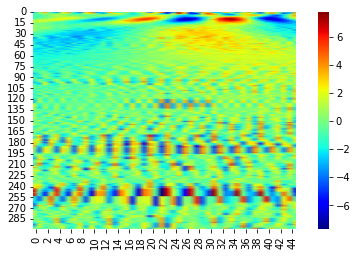

In [53]:
def wavelets1():
    for i in df_pca_list:
        coef,freqs = pywt.cwt(i[0],np.arange(1,300),wavelet='morl')
        sns.heatmap(coef,cmap='jet', shading='gouraud')
        plt.show()
def wavelets2():
    for i in df_pca_list:
        for j in range(len(pca.explained_variance_ratio_) - 1):
            coef,freqs = pywt.cwt(i[j],np.arange(1,300),wavelet='morl')
            sns.heatmap(coef,cmap='jet', shading='gouraud')
            plt.show()
#wavelets1()
#wavelets2()
coef,freqs = pywt.cwt(df_pca_list[1][1],np.arange(1,300),wavelet='morl')
sns.heatmap(coef, cmap='jet', shading='gouraud')
plt.show()